In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import math

In [2]:
df_track = pd.read_csv("device_track_full.csv")
df_elev = pd.read_csv("track_with_elevation.csv")

In [3]:
df_track.head()

,track_id,device_id,timestamp,longitude,latitude,battery_level,emergency_status,condition,off_track,segment_id
0,T-WAT_1-1762845227.0,WAT_1,2025-11-11T07:13:47,109.959301,-7.224694,65.96,False,badai petir,False,771.0
1,T-WAT_1-1762845287.0,WAT_1,2025-11-11T07:14:47,109.958848,-7.224514,65.91,False,badai petir,False,778.0
2,T-WAT_1-1762845347.0,WAT_1,2025-11-11T07:15:47,109.958525,-7.224461,65.90,False,badai petir,False,780.0
3,T-WAT_1-1762845407.0,WAT_1,2025-11-11T07:16:47,109.958535,-7.224219,65.85,False,badai petir,False,783.0
4,T-WAT_1-1762845467.0,WAT_1,2025-11-11T07:17:47,109.958295,-7.223958,65.81,False,badai petir,False,788.0


In [4]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711540 entries, 0 to 711539
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          711540 non-null  object 
 1   device_id         711540 non-null  object 
 2   timestamp         711540 non-null  object 
 3   longitude         711540 non-null  float64
 4   latitude          711540 non-null  float64
 5   battery_level     711540 non-null  float64
 6   emergency_status  711540 non-null  bool   
 7   condition         711540 non-null  object 
 8   off_track         711540 non-null  bool   
 9   segment_id        711540 non-null  float64
dtypes: bool(2), float64(4), object(4)
memory usage: 44.8+ MB


In [5]:
df_track["timestamp"] = pd.to_datetime(df_track["timestamp"])

In [16]:
df_track_1 = df_track[df_track['timestamp'].dt.date == pd.to_datetime("2025-11-11").date()].copy()
df_track_1.head()

,track_id,device_id,timestamp,longitude,latitude,battery_level,emergency_status,condition,off_track,segment_id
0,T-WAT_1-1762845227.0,WAT_1,2025-11-11 07:13:47,109.959301,-7.224694,65.96,False,badai petir,False,771.0
1,T-WAT_1-1762845287.0,WAT_1,2025-11-11 07:14:47,109.958848,-7.224514,65.91,False,badai petir,False,778.0
2,T-WAT_1-1762845347.0,WAT_1,2025-11-11 07:15:47,109.958525,-7.224461,65.90,False,badai petir,False,780.0
3,T-WAT_1-1762845407.0,WAT_1,2025-11-11 07:16:47,109.958535,-7.224219,65.85,False,badai petir,False,783.0
4,T-WAT_1-1762845467.0,WAT_1,2025-11-11 07:17:47,109.958295,-7.223958,65.81,False,badai petir,False,788.0


In [17]:
df_track_2 = df_track[df_track['timestamp'].dt.date == pd.to_datetime("2025-11-12").date()].copy()
df_track_2.head()

,track_id,device_id,timestamp,longitude,latitude,battery_level,emergency_status,condition,off_track,segment_id
269958,T-WAT_4-1762905600.0,WAT_4,2025-11-12 00:00:00,109.951494,-7.213285,90.07,False,hujan deras,False,969.0
269959,T-WAT_4-1762905660.0,WAT_4,2025-11-12 00:01:00,109.951526,-7.213578,90.02,False,hujan deras,False,966.0
269960,T-WAT_4-1762905720.0,WAT_4,2025-11-12 00:02:00,109.951730,-7.214133,89.99,False,hujan deras,False,958.0
269961,T-WAT_4-1762905780.0,WAT_4,2025-11-12 00:03:00,109.951948,-7.214546,89.95,False,hujan deras,False,954.0
269962,T-WAT_4-1762905840.0,WAT_4,2025-11-12 00:04:00,109.952239,-7.214912,89.93,False,hujan deras,False,945.0


In [18]:
df_track_3 = df_track[df_track['timestamp'].dt.date == pd.to_datetime("2025-11-13").date()].copy()
df_track_3.head()

,track_id,device_id,timestamp,longitude,latitude,battery_level,emergency_status,condition,off_track,segment_id
484217,T-WAT_943-1762992000.0,WAT_943,2025-11-13 00:00:00,109.957345,-7.220988,87.12,False,cerah,False,853.0
484218,T-WAT_943-1762992060.0,WAT_943,2025-11-13 00:01:00,109.957701,-7.221413,87.08,False,cerah,False,846.0
484219,T-WAT_943-1762992120.0,WAT_943,2025-11-13 00:02:00,109.958033,-7.221632,87.04,False,cerah,True,839.0
484220,T-WAT_943-1762992180.0,WAT_943,2025-11-13 00:03:00,109.958125,-7.222508,87.03,False,cerah,False,828.0
484221,T-WAT_943-1762992240.0,WAT_943,2025-11-13 00:04:00,109.958303,-7.222861,87.00,False,cerah,False,820.0


In [9]:
df_elev.head()

,track,lat,lon,elevation
0,Via Patakbanteng 001,-7.209568,109.925435,1996.0
1,Via Patakbanteng 001,-7.209640,109.925450,1996.0
2,Via Patakbanteng 001,-7.209698,109.925453,1996.0
3,Via Patakbanteng 001,-7.209734,109.925416,1996.0
4,Via Patakbanteng 001,-7.209695,109.925361,1996.0


In [10]:
# pastikan kolom terstandarisasi namanya
df_elev.rename(columns={ 
    "elevation": "ele"
}, inplace=True)

In [11]:
df_elev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   track   1308 non-null   object 
 1   lat     1308 non-null   float64
 2   lon     1308 non-null   float64
 3   ele     1308 non-null   float64
dtypes: float64(3), object(1)
memory usage: 41.0+ KB


In [12]:
# ==========================================================
# 2. HITUNG FITUR SEGMENT-LEVEL
# ==========================================================
# Setiap segment = titik i → i+1 dalam track_with_elevation

segments = []

for i in range(len(df_elev) - 1):
    lat1, lon1, ele1 = df_elev.loc[i, ["lat", "lon", "ele"]]
    lat2, lon2, ele2 = df_elev.loc[i+1, ["lat", "lon", "ele"]]

    # -----------------------------
    # a) segment length (meters)
    # -----------------------------
    R = 6371000
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = (math.sin(dphi/2)**2 +
         math.cos(phi1) * math.cos(phi2) * math.sin(dlambda/2)**2)
    dist = 2 * R * math.atan2(np.sqrt(a), np.sqrt(1 - a))

    # -----------------------------
    # b) slope (elevation gain / distance)
    # -----------------------------
    if dist == 0:
        slope = 0
    else:
        slope = (ele2 - ele1) / dist  # meters per meter → unitless

    # -----------------------------
    # c) curvature (perubahan heading)
    # -----------------------------
    # heading i → i+1
    heading1 = math.atan2(
        math.radians(lon2 - lon1),
        math.radians(lat2 - lat1)
    )

    # heading i+1 → i+2 (kalau ada)
    if i < len(df_elev) - 2:
        lat3, lon3 = df_elev.loc[i+2, ["lat", "lon"]]
        heading2 = math.atan2(
            math.radians(lon3 - lon2),
            math.radians(lat3 - lat2)
        )
        curvature = abs(heading2 - heading1)
    else:
        curvature = 0  # segment terakhir

    # simpan
    segments.append({
        "segment_id": i,
        "lat": lat1,
        "lon": lon1,
        "length_m": dist,
        "slope": slope,
        "curvature": curvature
    })

df_seg = pd.DataFrame(segments)

In [13]:
df_seg.head()

,segment_id,lat,lon,length_m,slope,curvature
0,0,-7.209568,109.925435,8.131323,0.0,0.161757
1,1,-7.209640,109.925450,6.521666,0.0,5.448443
2,2,-7.209698,109.925453,5.651978,0.0,1.391117
3,3,-7.209734,109.925416,7.517339,0.0,0.969437
4,4,-7.209695,109.925361,17.765037,0.0,0.054262


In [19]:
# ==========================================================
# 3. GABUNG DENGAN device_track (density, stuck, offtrack)
# ==========================================================

# hitung jumlah device per segmen berdasarkan kedekatan koordinat
def closest_segment(lat, lon):
    d = (df_seg["lat"] - lat)**2 + (df_seg["lon"] - lon)**2
    return d.idxmin()

df_track_1["segment_id"] = df_track_1.apply(
    lambda row: closest_segment(row["latitude"], row["longitude"]), axis=1
)

In [20]:
df_track_1[:10]

,track_id,device_id,timestamp,longitude,latitude,battery_level,emergency_status,condition,off_track,segment_id
0,T-WAT_1-1762845227.0,WAT_1,2025-11-11 07:13:47,109.959301,-7.224694,65.96,False,badai petir,False,771
1,T-WAT_1-1762845287.0,WAT_1,2025-11-11 07:14:47,109.958848,-7.224514,65.91,False,badai petir,False,778
2,T-WAT_1-1762845347.0,WAT_1,2025-11-11 07:15:47,109.958525,-7.224461,65.90,False,badai petir,False,780
3,T-WAT_1-1762845407.0,WAT_1,2025-11-11 07:16:47,109.958535,-7.224219,65.85,False,badai petir,False,783
4,T-WAT_1-1762845467.0,WAT_1,2025-11-11 07:17:47,109.958295,-7.223958,65.81,False,badai petir,False,788
5,T-WAT_1-1762845527.0,WAT_1,2025-11-11 07:18:47,109.958105,-7.223698,65.78,False,badai petir,False,799
6,T-WAT_1-1762845587.0,WAT_1,2025-11-11 07:19:47,109.957989,-7.223665,65.74,False,badai petir,False,798
7,T-WAT_1-1762845647.0,WAT_1,2025-11-11 07:20:47,109.958177,-7.223330,65.72,False,badai petir,False,802
8,T-WAT_1-1762845707.0,WAT_1,2025-11-11 07:21:47,109.957711,-7.223493,65.70,False,badai petir,True,807
9,T-WAT_1-1762845767.0,WAT_1,2025-11-11 07:22:47,109.957885,-7.223006,65.69,False,badai petir,False,812


In [21]:
# hitung fitur tambahan
seg_stats = df_track_1.groupby("segment_id").agg({
    "device_id": "count",
    "off_track": "mean"
}).rename(columns={
    "device_id": "density",
    "off_track": "offtrack_rate"
}).reset_index()

df_seg = df_seg.merge(seg_stats, on="segment_id", how="left")

df_seg.fillna({
    "density": 0,
    "offtrack_rate": 0
}, inplace=True)

In [33]:
# ==========================================================
# 4. DBSCAN CLUSTERING
# ==========================================================

features = df_seg[["length_m", "slope", "curvature", "density", "offtrack_rate"]]

# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(features)

# DBSCAN
db = DBSCAN(eps=0.9, min_samples=5).fit(X)

df_seg["cluster"] = db.labels_

# Label cluster
difficulty_map = {
    -1: "Noise / Outlier",
     0: "Mudah",
     1: "Sedang",
     2: "Sulit",
     3: "Sangat Sulit"
}

df_seg["difficulty"] = df_seg["cluster"].map(difficulty_map).fillna("Sulit")

In [23]:
df_seg[:10]

,segment_id,lat,lon,length_m,slope,curvature,density,offtrack_rate,cluster,difficulty
0,0,-7.209568,109.925435,8.131323,0.0,0.161757,257.0,0.031128,0,Mudah
1,1,-7.209640,109.925450,6.521666,0.0,5.448443,115.0,0.034783,1,Sedang
2,2,-7.209698,109.925453,5.651978,0.0,1.391117,65.0,0.030769,0,Mudah
3,3,-7.209734,109.925416,7.517339,0.0,0.969437,60.0,0.100000,0,Mudah
4,4,-7.209695,109.925361,17.765037,0.0,0.054262,122.0,0.049180,0,Mudah
5,5,-7.209536,109.925362,21.486915,0.0,0.125013,291.0,0.096220,0,Mudah
6,6,-7.209343,109.925374,6.966591,0.0,1.710626,240.0,0.008333,0,Mudah
7,7,-7.209280,109.925370,5.786896,0.0,0.031811,120.0,0.108333,0,Mudah
8,8,-7.209284,109.925422,13.544175,0.0,0.046315,131.0,0.007634,0,Mudah
9,9,-7.209298,109.925544,11.383159,0.0,0.226451,190.0,0.026316,0,Mudah


In [34]:
diff_count = df_seg.groupby("cluster").agg({
    "segment_id": "count"
})
print(diff_count)

         segment_id
cluster            
-1               24
 0             1268
 1               15


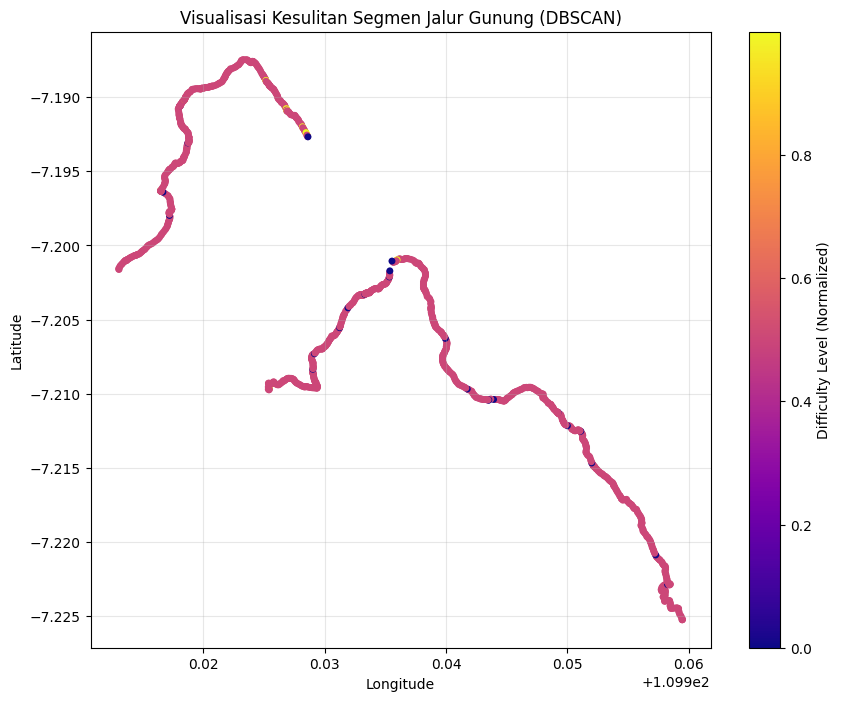

In [37]:
import matplotlib.pyplot as plt

difficulty = df_seg['cluster']
norm = (difficulty - difficulty.min()) / (difficulty.max() - difficulty.min() + 1e-9)

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    df_seg["lon"],
    df_seg["lat"],
    c=norm,
    cmap="plasma",     # bisa diganti viridis, inferno, turbo, magma, dll
    s=25,
    edgecolor="none"
)

plt.colorbar(sc, label="Difficulty Level (Normalized)")
plt.title("Visualisasi Kesulitan Segmen Jalur Gunung (DBSCAN)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)

plt.show()

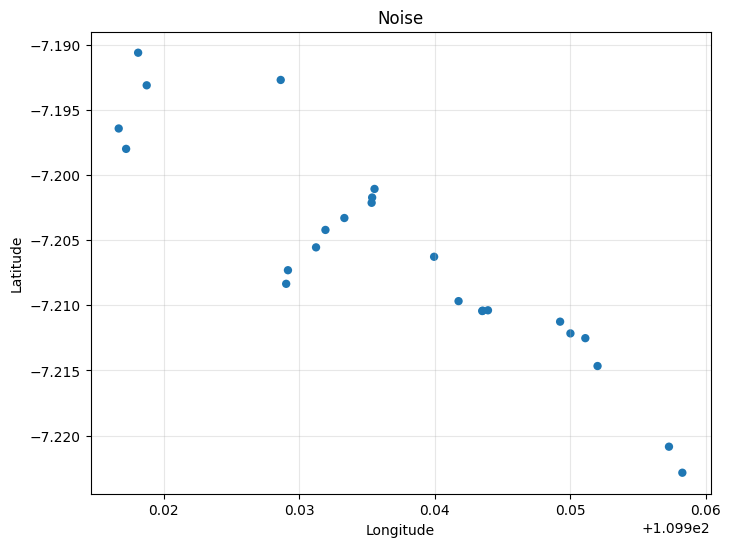

In [38]:
outlier = df_seg.loc[df_seg['cluster'] == -1]

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    outlier["lon"],
    outlier["lat"],     
    edgecolor="none"
)

plt.title("Noise")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)

plt.show()

In [39]:
outlier

,segment_id,lat,lon,length_m,slope,curvature,density,offtrack_rate,cluster,difficulty
91,91,-7.208344,109.929031,4.556932,13.825092,0.034692,94.0,0.042553,-1,Noise / Outlier
114,114,-7.207298,109.929163,6.714755,9.680175,0.268397,120.0,0.216667,-1,Noise / Outlier
165,165,-7.205542,109.931235,6.373757,10.825641,0.416689,109.0,0.036697,-1,Noise / Outlier
185,185,-7.204202,109.931928,12.995167,6.156135,0.180056,187.0,0.139037,-1,Noise / Outlier
222,222,-7.203287,109.933324,4.598043,32.187605,0.103271,54.0,0.000000,-1,Noise / Outlier
283,283,-7.202118,109.935336,4.455342,13.915879,0.183431,80.0,0.025000,-1,Noise / Outlier
290,290,-7.201711,109.935374,2460.800933,-0.188963,0.301368,69979.0,0.000114,-1,Noise / Outlier
369,369,-7.197974,109.917224,8.365881,8.367319,0.582170,47.0,0.021277,-1,Noise / Outlier
396,396,-7.196407,109.916678,15.405193,-3.894790,0.234890,171.0,0.029240,-1,Noise / Outlier
469,469,-7.193088,109.918742,3.142056,-3.500893,1.505744,44.0,0.045455,-1,Noise / Outlier


In [40]:
from sklearn import metrics

labels = db.labels_
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.76


In [ ]:
# ==========================================================
# 5. SAVE OUTPUT
# ==========================================================

# df_seg.to_csv("segment_difficulty_dbscan.csv", index=False)
# print("Saved: segment_difficulty_dbscan.csv")